#MODEL

##Load Data

In [13]:
import pandas as pd

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


##Data Preparation


###Data Separation As X and Y

In [15]:
y=df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [16]:
X=df.drop('logS',axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


###Data Splitting

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=100)


In [19]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


## Model Building

### Linear Regression

#### Training The model

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Applying The Model To Make Prediction

In [40]:
y_lr_train_pred=lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)

#### Evaluate model performance

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
lr_train_mse=mean_squared_error(y_train, y_lr_train_pred)
lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)

lr_train_r2_score=r2_score(y_train,y_lr_train_pred)
lr_test_r2_score=r2_score(y_test,y_lr_test_pred)

In [71]:
lr_results=pd.DataFrame(['LinearRegression',lr_train_mse,lr_test_mse,lr_train_r2_score,lr_test_r2_score]).transpose()
lr_results.columns=['Method','Train MSE','Test MSE', 'TRAIN R2 SCORE','TEST R2 SCORE']

In [44]:
lr_results

,Method,Training MSE,Test MSE,Train R2_scre,Test R2_score
0,LinearRegression,1.007536,1.020695,0.764505,0.789162


### Random Forest

#### Training The Model

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf=RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

#### Applying the model to make predictions

In [62]:
y_rf_train_pred=rf.predict(X_train)
y_rf_test_pred=rf.predict(X_test)

#### Evaluate The Model Performance

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
rf_train_mse=mean_squared_error(y_train,y_rf_train_pred)
rf_test_mse=mean_squared_error(y_test,y_rf_test_pred)

rf_train_r2_score=r2_score(y_train,y_rf_train_pred)
rf_test_r2_score=r2_score(y_test,y_rf_test_pred)

In [65]:
rf_results=pd.DataFrame(['LinearRegressor',rf_train_mse,rf_test_mse,rf_train_r2_score,rf_test_r2_score]).transpose()
rf_results.columns=['Method','Train MSE','Test MSE', 'TRAIN R2 SCORE','TEST R2 SCORE']

In [66]:
rf_results

,Method,Train MSE,Test MSE,TRAIN R2 SCORE,TEST R2 SCORE
0,LinearRegressor,1.028228,1.407688,0.759669,0.709223


### Model Comparison

In [75]:
df_models=pd.concat([lr_results,rf_results],axis=0).reset_index(drop=True)
df_models

,Method,Train MSE,Test MSE,TRAIN R2 SCORE,TEST R2 SCORE
0,LinearRegression,1.007536,1.020695,0.764505,0.789162
1,LinearRegressor,1.028228,1.407688,0.759669,0.709223


## Data Visualzation Of Predicted Results


Text(0, 0.5, 'Predict logS')

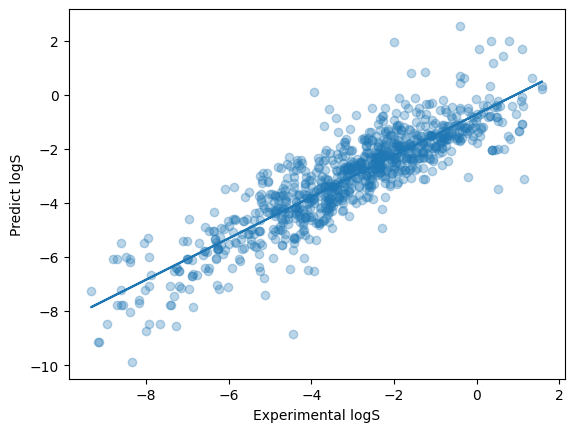

In [89]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x=y_train,y=y_lr_train_pred,alpha=0.3)

z=np.polyfit(y_train,y_lr_train_pred, 1)
p=np.poly1d(z)

plt.plot(y_train,p(y_train))
plt.xlabel('Experimental logS')
plt.ylabel('Predict logS')